<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/C%C3%B3pia_de_Projeto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importando bibliotecas necessarias para a aplicação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fazendo upload de arquivo

In [3]:
df_sales = pd.read_csv('sales_2019_export.csv', delimiter=';')

In [4]:
df_sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,168947,20in Monitor,1,109.99,2019-03-28 15:53:00,"485 10th St, Atlanta, GA 30301"
1,223730,iPhone,1,700.00,2019-07-09 19:10:00,"428 Washington St, Seattle, WA 98101"
2,251943,USB-C Charging Cable,1,11.95,2019-09-22 13:32:00,"140 North St, Boston, MA 02215"
3,177441,iPhone,1,700.00,2019-04-16 14:38:00,"559 Elm St, Dallas, TX 75001"
4,244840,iPhone,1,700.00,2019-08-13 20:13:00,"817 Cedar St, Dallas, TX 75001"


In [5]:
df_sales.tail()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
11872,186148,Lightning Charging Cable,1,14.95,2019-04-27 15:56:00,"714 Main St, Atlanta, GA 30301"
11873,186149,Bose SoundSport Headphones,1,99.99,2019-04-12 14:06:00,"294 West St, Portland, OR 97035"
11874,186150,20in Monitor,1,109.99,2019-04-23 07:30:00,"220 2nd St, Dallas, TX 75001"
11875,186151,27in 4K Gaming Monitor,1,389.99,2019-04-25 18:45:00,"323 Church St, Seattle, WA 98101"
11876,186152,iPhone,1,700.00,2019-04-26 23:56:00,"360 14th St,"


exibindo dimensões do dataframe

In [6]:
df_sales.shape

(11877, 6)

In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11877 entries, 0 to 11876
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          11877 non-null  int64  
 1   product           11877 non-null  object 
 2   quantity_ordered  11877 non-null  int64  
 3   price_each        11877 non-null  float64
 4   order_date        11877 non-null  object 
 5   purchase_address  11877 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 556.9+ KB


In [8]:
df_sales.dtypes

order_id              int64
product              object
quantity_ordered      int64
price_each          float64
order_date           object
purchase_address     object
dtype: object

In [9]:
df_sales.isnull().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64

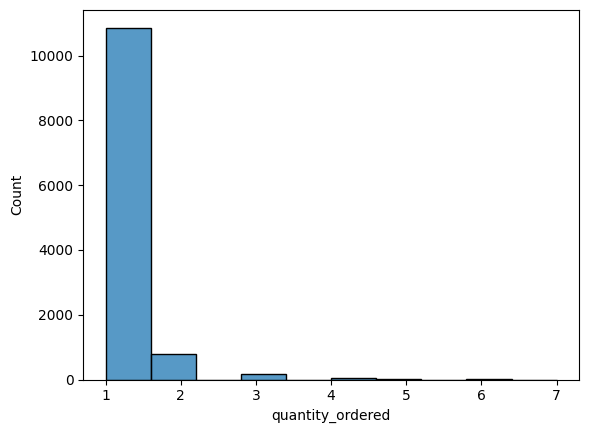

In [10]:
sns.histplot(df_sales['quantity_ordered'], bins=10);

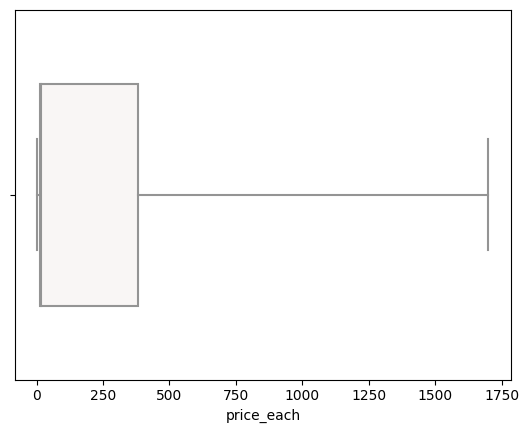

In [11]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="price_each", data=df_sales,
            whis=[0, 100], width=.6, palette="vlag");

analise exploratória dos dados 

In [12]:
df_sales.describe()

,order_id,quantity_ordered,price_each
count,11877.000000,11877.000000,11877.000000
mean,189838.618338,1.113160,227.123731
std,28578.030965,0.419698,345.802798
min,141437.000000,1.000000,2.990000
25%,179054.000000,1.000000,11.950000
50%,181905.000000,1.000000,14.950000
75%,184744.000000,1.000000,379.990000
max,319495.000000,7.000000,1700.000000


adicionando coluna 'month'


In [13]:
df_sales['Month'] = df_sales['order_date'].str[5:7]
df_sales['Month'] = df_sales['Month'].astype('int32')
df_sales.head(1000000)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,Month
0,168947,20in Monitor,1,109.99,2019-03-28 15:53:00,"485 10th St, Atlanta, GA 30301",3
1,223730,iPhone,1,700.00,2019-07-09 19:10:00,"428 Washington St, Seattle, WA 98101",7
2,251943,USB-C Charging Cable,1,11.95,2019-09-22 13:32:00,"140 North St, Boston, MA 02215",9
3,177441,iPhone,1,700.00,2019-04-16 14:38:00,"559 Elm St, Dallas, TX 75001",4
4,244840,iPhone,1,700.00,2019-08-13 20:13:00,"817 Cedar St, Dallas, TX 75001",8
...,...,...,...,...,...,...,...
11872,186148,Lightning Charging Cable,1,14.95,2019-04-27 15:56:00,"714 Main St, Atlanta, GA 30301",4
11873,186149,Bose SoundSport Headphones,1,99.99,2019-04-12 14:06:00,"294 West St, Portland, OR 97035",4
11874,186150,20in Monitor,1,109.99,2019-04-23 07:30:00,"220 2nd St, Dallas, TX 75001",4
11875,186151,27in 4K Gaming Monitor,1,389.99,2019-04-25 18:45:00,"323 Church St, Seattle, WA 98101",4


In [14]:
def get_date(date):
  return date.split(' ')[0]

# def get_hour(date):
#   return date.split(' ')[1]

# Extraindo a data e a hora da coluna order_date

df_sales['Date'] = df_sales['order_date'].apply(lambda x:  f"{get_date(x)}")
# df_sales['hour'] = df_sales['order_date'].apply(lambda x: f"{get_hour(x)}")
df_sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,Month,Date
0,168947,20in Monitor,1,109.99,2019-03-28 15:53:00,"485 10th St, Atlanta, GA 30301",3,2019-03-28
1,223730,iPhone,1,700.00,2019-07-09 19:10:00,"428 Washington St, Seattle, WA 98101",7,2019-07-09
2,251943,USB-C Charging Cable,1,11.95,2019-09-22 13:32:00,"140 North St, Boston, MA 02215",9,2019-09-22
3,177441,iPhone,1,700.00,2019-04-16 14:38:00,"559 Elm St, Dallas, TX 75001",4,2019-04-16
4,244840,iPhone,1,700.00,2019-08-13 20:13:00,"817 Cedar St, Dallas, TX 75001",8,2019-08-13


In [15]:
# transformando a coluna date no formato de data 'datetime64[ns]'
df_sales['Date'] = df_sales['Date'].astype('datetime64[ns]')
df_sales

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,Month,Date
0,168947,20in Monitor,1,109.99,2019-03-28 15:53:00,"485 10th St, Atlanta, GA 30301",3,2019-03-28
1,223730,iPhone,1,700.00,2019-07-09 19:10:00,"428 Washington St, Seattle, WA 98101",7,2019-07-09
2,251943,USB-C Charging Cable,1,11.95,2019-09-22 13:32:00,"140 North St, Boston, MA 02215",9,2019-09-22
3,177441,iPhone,1,700.00,2019-04-16 14:38:00,"559 Elm St, Dallas, TX 75001",4,2019-04-16
4,244840,iPhone,1,700.00,2019-08-13 20:13:00,"817 Cedar St, Dallas, TX 75001",8,2019-08-13
...,...,...,...,...,...,...,...,...
11872,186148,Lightning Charging Cable,1,14.95,2019-04-27 15:56:00,"714 Main St, Atlanta, GA 30301",4,2019-04-27
11873,186149,Bose SoundSport Headphones,1,99.99,2019-04-12 14:06:00,"294 West St, Portland, OR 97035",4,2019-04-12
11874,186150,20in Monitor,1,109.99,2019-04-23 07:30:00,"220 2nd St, Dallas, TX 75001",4,2019-04-23
11875,186151,27in 4K Gaming Monitor,1,389.99,2019-04-25 18:45:00,"323 Church St, Seattle, WA 98101",4,2019-04-25


In [16]:
# Construindo a coluna Sales
df_sales['Sales'] = df_sales['quantity_ordered'] * df_sales['price_each']

In [17]:
df_sales.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,Month,Date,Sales
0,168947,20in Monitor,1,109.99,2019-03-28 15:53:00,"485 10th St, Atlanta, GA 30301",3,2019-03-28,109.99
1,223730,iPhone,1,700.00,2019-07-09 19:10:00,"428 Washington St, Seattle, WA 98101",7,2019-07-09,700.00
2,251943,USB-C Charging Cable,1,11.95,2019-09-22 13:32:00,"140 North St, Boston, MA 02215",9,2019-09-22,11.95
3,177441,iPhone,1,700.00,2019-04-16 14:38:00,"559 Elm St, Dallas, TX 75001",4,2019-04-16,700.00
4,244840,iPhone,1,700.00,2019-08-13 20:13:00,"817 Cedar St, Dallas, TX 75001",8,2019-08-13,700.00


In [18]:
df_sales_new = df_sales[['Date', 'Sales']]

In [19]:
df_sales_new

,Date,Sales
0,2019-03-28,109.99
1,2019-07-09,700.00
2,2019-09-22,11.95
3,2019-04-16,700.00
4,2019-08-13,700.00
...,...,...
11872,2019-04-27,14.95
11873,2019-04-12,99.99
11874,2019-04-23,109.99
11875,2019-04-25,389.99


In [20]:
# normalizando as vendas
df_sales_normalizado = df_sales_new.copy()

for i in df_sales_normalizado.columns[1:]:
  df_sales_normalizado[i] = df_sales_normalizado[i] / df_sales_normalizado[i][0]

In [21]:
# Valores das vendas normalizados!!

df_sales_normalizado.head()

,Date,Sales
0,2019-03-28,1.000000
1,2019-07-09,6.364215
2,2019-09-22,0.108646
3,2019-04-16,6.364215
4,2019-08-13,6.364215


In [22]:
df_sales_normalizado.to_csv('sales_2019_export_date_normalizado.csv', sep=';')

# Vamos construir um modelo de Séries Temporais

In [23]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00


In [24]:
import plotly.express as px
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [25]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataset = pd.read_csv('sales_2019_export_date_normalizado.csv', sep = ';', parse_dates=['Date'], index_col='Date',
                      date_parser = dateparse, usecols = ['Date', 'Sales'])
dataset

,Sales
Date,
2019-03-28,1.000000
2019-07-09,6.364215
2019-09-22,0.108646
2019-04-16,6.364215
2019-08-13,6.364215
...,...
2019-04-27,0.135921
2019-04-12,0.909083
2019-04-23,1.000000


In [26]:
time_series = dataset['Sales']

In [27]:
time_series

Date
2019-03-28    1.000000
2019-07-09    6.364215
2019-09-22    0.108646
2019-04-16    6.364215
2019-08-13    6.364215
                ...   
2019-04-27    0.135921
2019-04-12    0.909083
2019-04-23    1.000000
2019-04-25    3.545686
2019-04-26    6.364215
Name: Sales, Length: 11877, dtype: float64

## Exploração da Time Series

In [28]:
time_series[1]

6.364214928629876

In [29]:
time_series['2019-05-12']

Date
2019-05-12     0.109010
2019-05-12     6.364215
2019-05-12    15.455951
2019-05-12     1.000000
Name: Sales, dtype: float64

In [31]:
# Valores Máximos e Mínimos da Time Series
time_series.index.max(), time_series.index.min()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2019-01-02 00:00:00'))

In [32]:
figura = px.line(title='Histórico do preço das vendas')
figura.add_scatter(x = time_series.index, y = time_series)

In [33]:
time_series_datas = time_series['2019-01-01':'2019-12-31']

<ipython-input-33-671a227856ff>:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



In [34]:
time_series_datas

Date
2019-03-28    1.000000
2019-07-09    6.364215
2019-09-22    0.108646
2019-04-16    6.364215
2019-08-13    6.364215
                ...   
2019-04-27    0.135921
2019-04-12    0.909083
2019-04-23    1.000000
2019-04-25    3.545686
2019-04-26    6.364215
Name: Sales, Length: 11876, dtype: float64

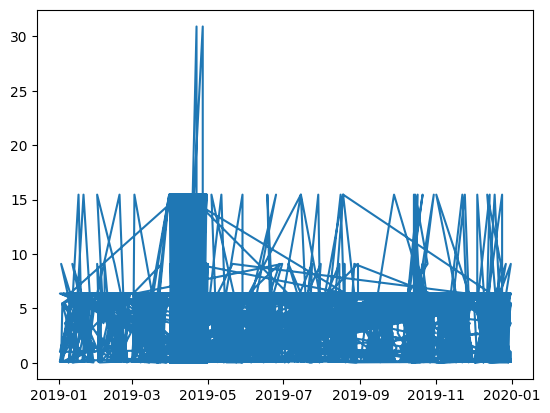

In [35]:
#gerando sub-DataFrames

plt.plot(time_series_datas);

## Decomposição

In [36]:
decomposicao = seasonal_decompose(time_series, period=len(time_series) // 2)
decomposicao

In [37]:
tendencia = decomposicao.trend # tendencias
sazonal = decomposicao.seasonal # sazonalidade
aleatorio = decomposicao.resid # residuais

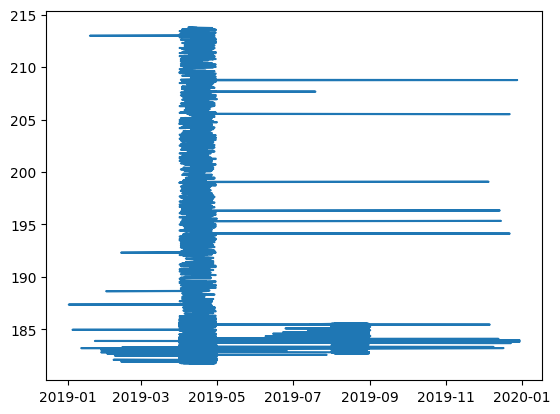

In [ ]:
plt.plot(tendencia);

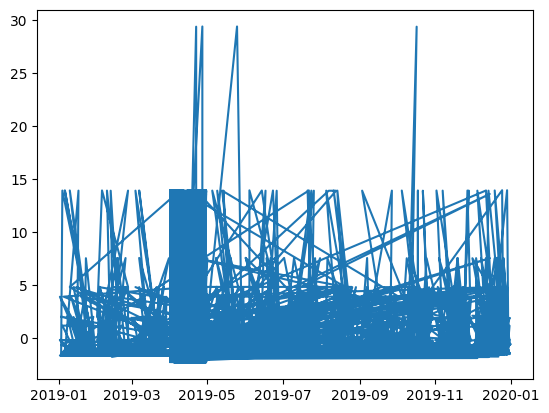

In [38]:
plt.plot(sazonal);

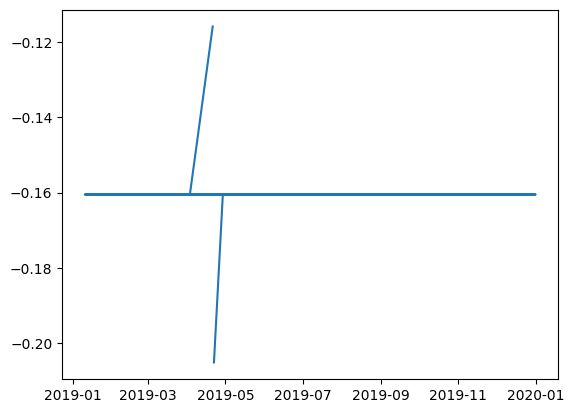

In [39]:
plt.plot(aleatorio);

## Previsões *ARIMA*

In [40]:
# o auto_arima vai escolher melhor os hiperparâmetros para que o algoritmo escolha os melhores
modelo = auto_arima(time_series, suppress_warnings=True, error_action='ignore')

In [41]:
# Parâmetros P, Q e D
modelo.order

(5, 1, 0)

In [42]:
previsoes = modelo.predict(n_periods=90)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [43]:
previsoes = np.array(previsoes)
previsoes

array([1.98819017, 2.39495009, 2.68379695, 3.01345384, 3.32270713,
       3.27920776, 2.78451414, 2.92127259, 2.99899762, 3.05396518,
       3.05786711, 3.01501283, 2.9731994 , 3.0041741 , 3.01682076,
       3.02002616, 3.01424021, 3.00730187, 3.00616664, 3.01149245,
       3.01259348, 3.01193747, 3.01060744, 3.01004508, 3.01049628,
       3.01118876, 3.01113131, 3.01089852, 3.01073017, 3.01075334,
       3.01086746, 3.01092596, 3.01088287, 3.01084337, 3.01083463,
       3.01085179, 3.01086747, 3.01086728, 3.01085781, 3.01085387,
       3.01085559, 3.01085898, 3.0108601 , 3.0108589 , 3.01085756,
       3.01085753, 3.01085812, 3.01085852, 3.01085844, 3.01085818,
       3.01085806, 3.01085815, 3.01085825, 3.01085826, 3.01085822,
       3.01085819, 3.01085819, 3.01085821, 3.01085822, 3.01085821,
       3.01085821, 3.0108582 , 3.01085821, 3.01085821, 3.01085821,
       3.01085821, 3.01085821, 3.01085821, 3.01085821, 3.01085821,
       3.01085821, 3.01085821, 3.01085821, 3.01085821, 3.01085

In [44]:
len(time_series)

11877

In [45]:
treinamento = time_series[:11877]
treinamento.shape

(11877,)

In [46]:
treinamento.index.min(), treinamento.index.max()

(Timestamp('2019-01-02 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [51]:
teste = time_series[10000:]
teste.shape

(1877,)

In [52]:
teste.index.min(), teste.index.max()

(Timestamp('2019-01-02 00:00:00'), Timestamp('2019-12-22 00:00:00'))

In [53]:
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [54]:
modelo2.order

(5, 1, 0)

In [55]:
teste.index

DatetimeIndex(['2019-04-24', '2019-04-03', '2019-04-22', '2019-04-13',
               '2019-04-14', '2019-04-20', '2019-04-24', '2019-04-06',
               '2019-04-03', '2019-04-19',
               ...
               '2019-04-28', '2019-04-12', '2019-04-05', '2019-04-10',
               '2019-04-04', '2019-04-27', '2019-04-12', '2019-04-23',
               '2019-04-25', '2019-04-26'],
              dtype='datetime64[ns]', name='Date', length=1877, freq=None)

In [57]:
previsoes = pd.DataFrame(modelo2.predict(n_periods=1877).values, index=teste.index)
previsoes.columns = ['previsoes']
previsoes

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



,previsoes
Date,
2019-04-24,1.988190
2019-04-03,2.394950
2019-04-22,2.683797
2019-04-13,3.013454
2019-04-14,3.322707
...,...
2019-04-27,3.010858
2019-04-12,3.010858
2019-04-23,3.010858


In [58]:
teste

Date
2019-04-24    3.454769
2019-04-03    0.135921
2019-04-22    0.108646
2019-04-13    0.108646
2019-04-14    0.109010
                ...   
2019-04-27    0.135921
2019-04-12    0.909083
2019-04-23    1.000000
2019-04-25    3.545686
2019-04-26    6.364215
Name: Sales, Length: 1877, dtype: float64

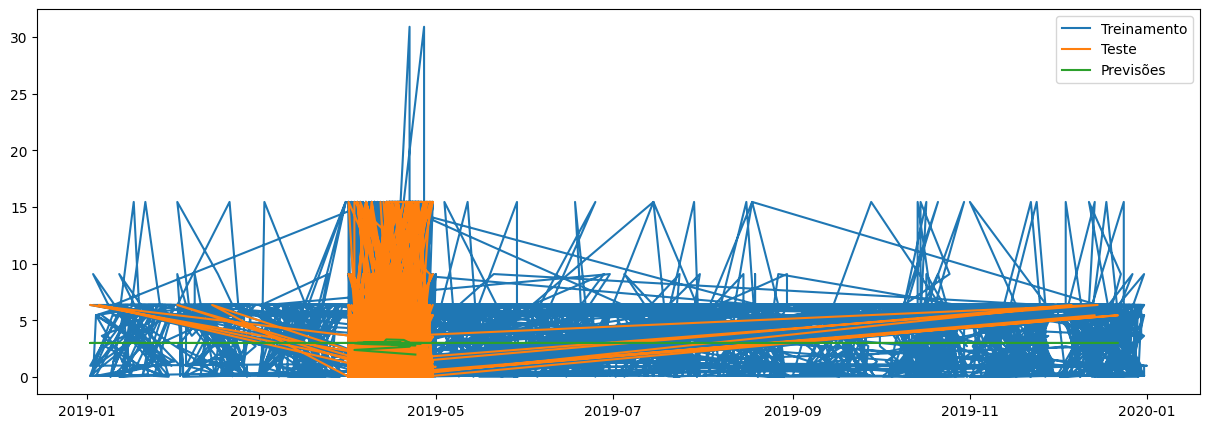

In [59]:
plt.figure(figsize=(15,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')
plt.legend();

adicionando coluna sales

In [ ]:
df_sales['Sales'] = df_sales['quantity_ordered'] * df_sales['price_each']
df_sales.head(57574)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,Month,Sales
0,168947,20in Monitor,1,109.99,2019-03-28 15:53:00,"485 10th St, Atlanta, GA 30301",3,109.99
1,223730,iPhone,1,700.00,2019-07-09 19:10:00,"428 Washington St, Seattle, WA 98101",7,700.00
2,251943,USB-C Charging Cable,1,11.95,2019-09-22 13:32:00,"140 North St, Boston, MA 02215",9,11.95
3,177441,iPhone,1,700.00,2019-04-16 14:38:00,"559 Elm St, Dallas, TX 75001",4,700.00
4,244840,iPhone,1,700.00,2019-08-13 20:13:00,"817 Cedar St, Dallas, TX 75001",8,700.00
...,...,...,...,...,...,...,...,...
57569,151406,AA Batteries (4-pack),4,3.84,2019-02-24 14:32:00,"537 Lake St, Seattle, WA 98101",2,15.36
57570,151407,AAA Batteries (4-pack),3,2.99,2019-02-13 12:56:00,"940 Adams St, San Francisco, CA 94016",2,8.97
57571,151408,USB-C Charging Cable,1,11.95,2019-02-12 23:24:00,"813 9th St, San Francisco, CA 94016",2,11.95
57572,151409,Bose SoundSport Headphones,1,99.99,2019-02-25 08:52:00,"121 Walnut St, Austin, TX 73301",2,99.99


In [ ]:
df_sales.drop(columns='order_id', inplace=True)

In [ ]:
results = df_sales.groupby('Month').sum()

<ipython-input-16-46821da18603>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df_sales.groupby('Month').sum()


In [ ]:
results['Ticket Médio'] = results['Sales'] / len(results)
results 

,quantity_ordered,price_each,Sales,Ticket Médio
Month,,,,
1,10903,1811768.38,1822256.73,151854.727500
2,13449,2188884.72,2202022.42,183501.868333
3,17005,2791207.83,2807100.38,233925.031667
4,20558,3367671.02,3390670.24,282555.853333
5,18667,3135125.13,3152606.75,262717.229167
6,15253,2562025.61,2577802.26,214816.855000
7,16072,2632539.56,2647775.76,220647.980000
8,13448,2230345.42,2244467.88,187038.990000
9,13109,2084992.09,2097560.13,174796.677500


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product           185950 non-null  object 
 1   quantity_ordered  185950 non-null  int64  
 2   price_each        185950 non-null  float64
 3   order_date        185950 non-null  object 
 4   purchase_address  185950 non-null  object 
 5   Month             185950 non-null  int32  
 6   Sales             185950 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 9.2+ MB


QUAIS OS MELHORES MESES PARA COMPRAS? QUANTO DE RECEITA FOI GERADO EM CADA MES? 

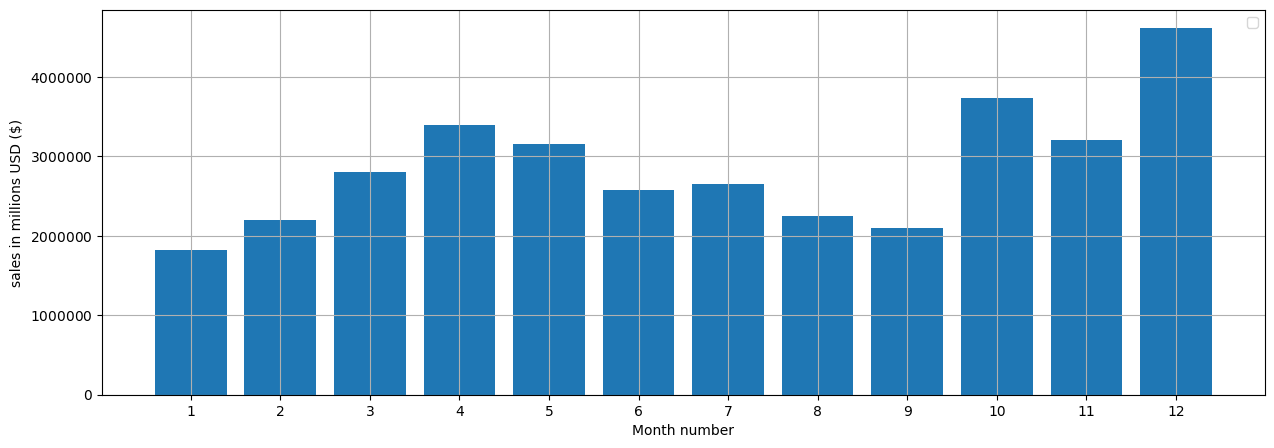

In [ ]:
months = range(1,13)

plt.figure(figsize=(15,5))

# Plotando o gráfico
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('sales in millions USD ($)')
plt.xlabel('Month number')



# Alterando a escala das vendas (Milhões)
plt.ticklabel_format(style='plain', axis='y', useMathText=True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0, 0))

# Coloca Grid no gráfico
plt.grid(True)
plt.legend()
plt.show()

adicionando coluna cidade 

In [ ]:
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

df_sales['city'] = df_sales['purchase_address'].apply(lambda x:  f"{get_city(x)} ({get_state(x)})")
df_sales.head(57574)

,product,quantity_ordered,price_each,order_date,purchase_address,Month,Sales,city
0,20in Monitor,1,109.99,2019-03-28 15:53:00,"485 10th St, Atlanta, GA 30301",3,109.99,Atlanta (GA)
1,iPhone,1,700.00,2019-07-09 19:10:00,"428 Washington St, Seattle, WA 98101",7,700.00,Seattle (WA)
2,USB-C Charging Cable,1,11.95,2019-09-22 13:32:00,"140 North St, Boston, MA 02215",9,11.95,Boston (MA)
3,iPhone,1,700.00,2019-04-16 14:38:00,"559 Elm St, Dallas, TX 75001",4,700.00,Dallas (TX)
4,iPhone,1,700.00,2019-08-13 20:13:00,"817 Cedar St, Dallas, TX 75001",8,700.00,Dallas (TX)
...,...,...,...,...,...,...,...,...
57569,AA Batteries (4-pack),4,3.84,2019-02-24 14:32:00,"537 Lake St, Seattle, WA 98101",2,15.36,Seattle (WA)
57570,AAA Batteries (4-pack),3,2.99,2019-02-13 12:56:00,"940 Adams St, San Francisco, CA 94016",2,8.97,San Francisco (CA)
57571,USB-C Charging Cable,1,11.95,2019-02-12 23:24:00,"813 9th St, San Francisco, CA 94016",2,11.95,San Francisco (CA)
57572,Bose SoundSport Headphones,1,99.99,2019-02-25 08:52:00,"121 Walnut St, Austin, TX 73301",2,99.99,Austin (TX)


QUAL CIDADE TEVE O MAIOR NUMERO DE VENDAS ? 

In [ ]:
# Aqui estamos mostrando a somatória total das vendas do ano por cidade
results = df_sales.groupby('city').sum()
results

<ipython-input-27-718aec058151>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df_sales.groupby('city').sum()


,quantity_ordered,price_each,Month,Sales
city,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


In [ ]:
order_results = results['Sales'].values

In [ ]:
print(list(order_results))

[2795498.58, 1819581.75, 3661642.0100000002, 2767975.4, 5452570.8, 4664317.43, 449758.27, 1870732.34, 8262203.91, 2747755.48]


In [ ]:
print(sorted(order_results))

[449758.27, 1819581.75, 1870732.34, 2747755.48, 2767975.4, 2795498.58, 3661642.0100000002, 4664317.43, 5452570.8, 8262203.91]


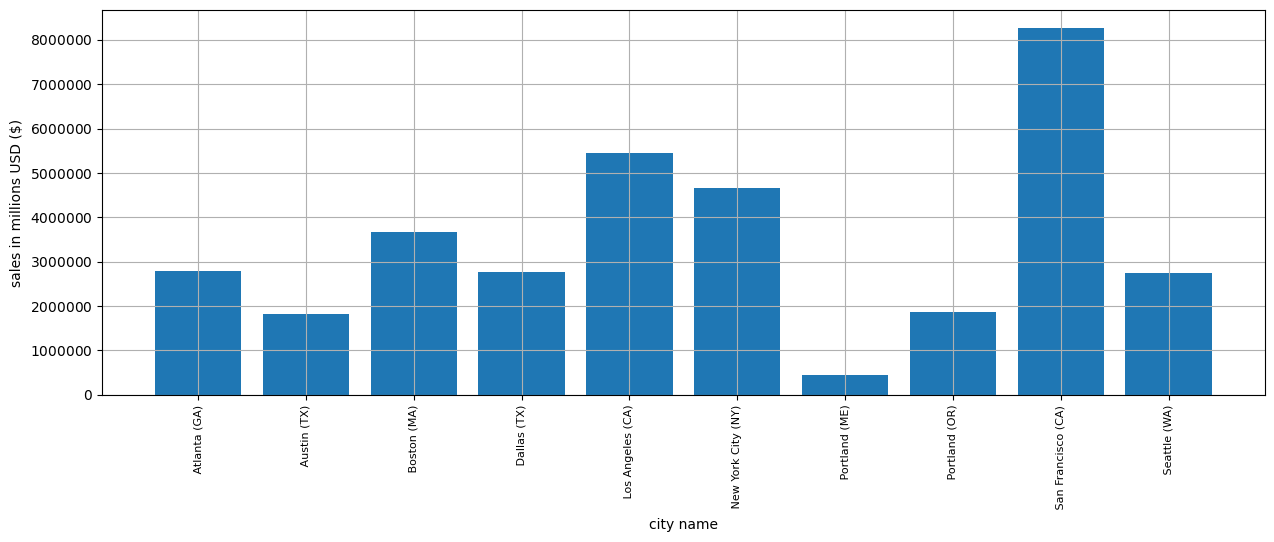

In [ ]:
cities = [ city for city, df in df_sales.groupby('city')]

#cities = df_sales['city'].unique()

plt.figure(figsize=(15,5))


plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel('sales in millions USD ($)')
plt.xlabel('city name')

# Alterando a escala das vendas (Milhões)
plt.ticklabel_format(style='plain', axis='y', useMathText=True)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0, 0))

plt.grid(True)
plt.show()

a que horas poderia se exibir anúncios para maximizar a probabilidade dos clientes comprarem algum produto ?

In [ ]:
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'])
df_sales.head(1000000)

,product,quantity_ordered,price_each,order_date,purchase_address,Month,Sales,city
0,20in Monitor,1,109.99,2019-03-28 15:53:00,"485 10th St, Atlanta, GA 30301",3,109.99,Atlanta (GA)
1,iPhone,1,700.00,2019-07-09 19:10:00,"428 Washington St, Seattle, WA 98101",7,700.00,Seattle (WA)
2,USB-C Charging Cable,1,11.95,2019-09-22 13:32:00,"140 North St, Boston, MA 02215",9,11.95,Boston (MA)
3,iPhone,1,700.00,2019-04-16 14:38:00,"559 Elm St, Dallas, TX 75001",4,700.00,Dallas (TX)
4,iPhone,1,700.00,2019-08-13 20:13:00,"817 Cedar St, Dallas, TX 75001",8,700.00,Dallas (TX)
...,...,...,...,...,...,...,...,...
185945,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
185946,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
185947,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
185948,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [ ]:
df_sales['hour'] = df_sales['order_date'].dt.hour
df_sales['minute'] = df_sales['order_date'].dt.minute

df_sales.head(1000000)

,product,quantity_ordered,price_each,order_date,purchase_address,Month,Sales,city,hour,minute
0,20in Monitor,1,109.99,2019-03-28 15:53:00,"485 10th St, Atlanta, GA 30301",3,109.99,Atlanta (GA),15,53
1,iPhone,1,700.00,2019-07-09 19:10:00,"428 Washington St, Seattle, WA 98101",7,700.00,Seattle (WA),19,10
2,USB-C Charging Cable,1,11.95,2019-09-22 13:32:00,"140 North St, Boston, MA 02215",9,11.95,Boston (MA),13,32
3,iPhone,1,700.00,2019-04-16 14:38:00,"559 Elm St, Dallas, TX 75001",4,700.00,Dallas (TX),14,38
4,iPhone,1,700.00,2019-08-13 20:13:00,"817 Cedar St, Dallas, TX 75001",8,700.00,Dallas (TX),20,13
...,...,...,...,...,...,...,...,...,...,...
185945,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
185946,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
185947,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
185948,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


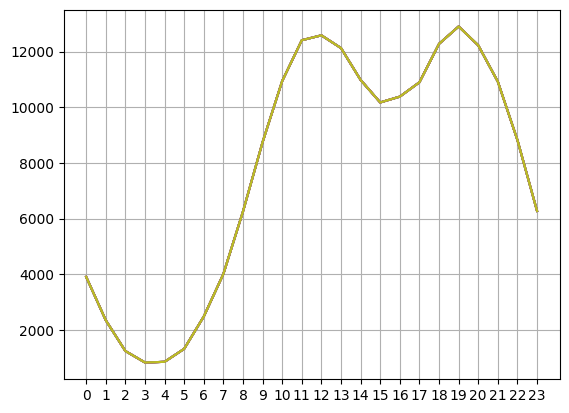

In [ ]:
hours = [ hour for hour, df in df_sales.groupby('hour') ]

plt.plot(hours, df_sales.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()